# Flight Price Prediction

## 1. Problem Definition

**Objective**:  
The goal is to predict flight prices based on various factors such as the airline, journey date, source, destination, and additional details.  

**Target Variable**:  
`Price` (the flight price).  

**Features**:  
- `Airline`  :
- `Date_of_Journey`  
- `Source`  
- `Destination`  
- `Route`  
- `Dep_Time`  
- `Arrival_Time`  
- `Duration`  
- `Total_Stops`  
- `Additional_Info`  

## Importing the main libraries which is use in this data analysing Notebook by the help of the Python

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Collection

**Source**:  
The dataset is in an Excel file containing historical flight data.  

**Data Structure**:  
- **Columns**: `Airline`, `Date_of_Journey`, `Source`, `Destination`, `Route`, `Dep_Time`, `Arrival_Time`, `Duration`, `Total_Stops`, `Additional_Info`, and `Price`.  
- **Number of Entries**: 10,683 records.  


# Reading the data from Excel sheet
#### Data name is flight price in this data we perform the many EDA pard like data cleaning and the data encoding data type conversion. we also using the time and and ananlysing the time

In [2]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Understanding the data by the help of the some basice function like info,shape , and describe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### when we using the info function we clearly see the most of the feature is object data type so we need to convert most of these into the relevent data type accordingly to requirements

In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In the above describe function we easilt see the function give the information about the price only so that most of the features in this data is object data type so we need to firstly convert into the relevent data type


In [5]:
df.shape

(10683, 11)

## 3. Data Preprocessing


### Data Cleaning
- Handle missing values in `Route` and `Total_Stops` (e.g., fill missing values or remove rows with missing data).  
- Convert `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` to datetime format.  
- Handle any inconsistencies in `Total_Stops` (e.g., ensuring the values are in the correct format).  


In [12]:
# finding the missing Data into the data frame
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [10]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df, columns):
  for column in columns:
    # Create an imputer object with strategy='most_frequent' for categorical columns
    if df[column].dtype == 'object':
      imputer = SimpleImputer(strategy='most_frequent')
    # Create an imputer object with strategy='median' for numerical columns
    else:
      imputer = SimpleImputer(strategy='median')
    # Apply the imputer to the column
    df[column] = imputer.fit_transform(df[[column]]).ravel() # Changed line
  return df # Moved outside the loop

In [11]:
df=impute_missing_values(df,['Route','Total_Stops'])

In [13]:
## chaking the duplicates into the data frame
df.duplicated().sum()

220

220 duplicated entreies in this data set but we can't remove this because many flight fly the same root many time so this opration is not important to use in this data

In [14]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8345
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [15]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No Information')


In [16]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8345
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Information,3
1 Short layover,1
Red-eye flight,1


### Feature Engineering
- Extract features like `Journey_day`, `Journey_month`, `Dep_hour`, `Dep_minute`, `Arrival_hour`, `Arrival_minute`, etc., from `Date_of_Journey`, `Dep_Time`, and `Arrival_Time`.  
- Convert categorical features (`Airline`, `Source`, `Destination`, `Route`, `Additional_Info`) into numerical representations using techniques like one-hot encoding or label encoding.  


In [18]:
import pandas as pd

class FlightDataProcessor:
    """
    A class for processing flight data with methods to extract and transform specific columns.
    """

    def __init__(self, df):
        """
        Initialize the FlightDataProcessor with a DataFrame.

        Parameters:
            df (pd.DataFrame): The input DataFrame containing flight data.
        """
        self.df = df

    def extract_day_month_year(self, date_column):
        """
        Extract the day name and month name from a date column.

        Parameters:
            date_column (str): The name of the date column to process.

        Raises:
            ValueError: If the specified column does not exist in the DataFrame.
        """
        if date_column not in self.df.columns:
            raise ValueError(f"The column '{date_column}' does not exist in the DataFrame.")

        # Convert the date column to datetime format
        self.df[date_column] = pd.to_datetime(self.df[date_column], dayfirst=True)

        # Extract day and month names
        self.df['Day'] = self.df[date_column].dt.day_name()
        self.df['Month'] = self.df[date_column].dt.month_name()

    def extract_arrival_time(self, arrival_column):
        """
        Extract the hour and minute from an arrival time column.

        Parameters:
            arrival_column (str): The name of the arrival time column.
        """
        if arrival_column not in self.df.columns:
            raise ValueError(f"The column '{arrival_column}' does not exist in the DataFrame.")

        # Extract only the time part if the column contains both date and time
        self.df[arrival_column] = self.df[arrival_column].apply(lambda x: x.split(' ')[0])

        # Split the time into hour and minute
        self.df['Arrival_Hour'] = self.df[arrival_column].str.split(':').str[0].astype(int)
        self.df['Arrival_Minute'] = self.df[arrival_column].str.split(':').str[1].astype(int)

    def extract_departure_time(self, departure_column):
        """
        Extract the hour and minute from a departure time column.

        Parameters:
            departure_column (str): The name of the departure time column.
        """
        if departure_column not in self.df.columns:
            raise ValueError(f"The column '{departure_column}' does not exist in the DataFrame.")

        # Split the time into hour and minute
        self.df['Departure_Hour'] = self.df[departure_column].str.split(':').str[0].astype(int)
        self.df['Departure_Minute'] = self.df[departure_column].str.split(':').str[1].astype(int)

    def convert_duration(self, duration_column):
        """
        Convert flight duration strings into total minutes.

        Parameters:
            duration_column (str): The name of the duration column to process.
        """
        if duration_column not in self.df.columns:
            raise ValueError(f"The column '{duration_column}' does not exist in the DataFrame.")

        def convert(duration):
            """
            Helper function to convert a duration string into total minutes.

            Examples:
                '2h 45m' -> 165
                '3h' -> 180
                '50m' -> 50
            """
            if pd.isna(duration):
                return None
            parts = duration.split()
            hours = int(parts[0][:-1]) if 'h' in parts[0] else 0
            minutes = int(parts[1][:-1]) if len(parts) > 1 and 'm' in parts[1] else 0
            return hours * 60 + minutes

        # Apply the conversion to the duration column
        self.df['Duration_Minutes'] = self.df[duration_column].apply(convert)

    def drop_columns(self, columns):
        """
        Drop specified columns from the DataFrame.

        Parameters:
            columns (list): List of column names to be dropped.
        """
        self.df.drop(columns=columns, inplace=True)


In [19]:
flight=FlightDataProcessor(df)

In [20]:
flight.extract_day_month_year('Date_of_Journey')
flight.convert_duration('Duration')
flight.extract_arrival_time('Arrival_Time')
flight.extract_departure_time('Dep_Time')
flight.drop_columns(['Route','Dep_Time','Arrival_Time','Duration','Date_of_Journey'])

In [21]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Duration_Minutes,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,Sunday,March,170,1,10,22,20
1,Air India,Kolkata,Banglore,2 stops,No info,7662,Wednesday,May,445,13,15,5,50
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,Sunday,June,1140,4,25,9,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,Sunday,May,325,23,30,18,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,Friday,March,285,21,35,16,50


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10683 non-null  object
 4   Additional_Info   10683 non-null  object
 5   Price             10683 non-null  int64 
 6   Day               10683 non-null  object
 7   Month             10683 non-null  object
 8   Duration_Minutes  10683 non-null  int64 
 9   Arrival_Hour      10683 non-null  int64 
 10  Arrival_Minute    10683 non-null  int64 
 11  Departure_Hour    10683 non-null  int64 
 12  Departure_Minute  10683 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


Here we cleanng the arrivale time column and creating the arrivale mint arrivale hour

In [23]:
# def extract_arrival_time(df, arrival_time_column):
#     # Split the 'Arrival_Time' to remove the date part (if any)
#     df[arrival_time_column] = df[arrival_time_column].apply(lambda x: x.split(' ')[0])

#     # Extract the hour and minute from the 'Arrival_Time' and convert them to integers
#     df['arrival_hour'] = df[arrival_time_column].str.split(':').str[0].astype(int)
#     df['arrival_mint'] = df[arrival_time_column].str.split(':').str[1].astype(int)

#     return df

# # Example of usage
# df = extract_arrival_time(df, 'Arrival_Time')


Here we Create the ne

In [24]:
# def extract_depature_time(df, Dep_Time):
#     # Split the 'Dep_Time' to remove the date part (if any)
#     df[Dep_Time] = df[Dep_Time].apply(lambda x: x.split(' ')[0])

#     # Extract the hour and minute from the 'Dep_Time' and convert them to integers
#     df['Dep_hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
#     df['Dep_mint']=df['Dep_Time'].str.split(':').str[1].astype(int)
#     df.drop(['Dep_Time'], axis=1, inplace=True)

#     return df

# # Example of usage
# df = extract_depature_time(df, 'Dep_Time')


In [25]:
# # Convert "Duration" to total minutes
# def convert_duration(duration):
#     if pd.isna(duration):
#         return None# Function to convert duration string to total hours (with fractions for minutes)
# def convert_duration(duration):
#     # Check for missing values and handle them
#     if pd.isna(duration):
#         return None

#     # Split the duration string into parts based on spaces
#     duration_parts = duration.split()

#     # Extract hours from the first part if it contains 'h'
#     hours = int(duration_parts[0][:-1]) if 'h' in duration_parts[0] else 0

#     # Extract minutes from the second part if it exists and contains 'm'
#     minutes = int(duration_parts[1][:-1]) if len(duration_parts) > 1 and 'm' in duration_parts[1] else 0
#     # Convert total time to hours (minutes are divided by 60)
#     total_hours = hours*60 + minutes

#     return total_hours

# # Example usage to apply the function to the 'Duration' column
# # data['Duration_in_hours'] = data['Duration'].apply(convert_duration)

#     parts = duration.split()
#     hours = int(parts[0][:-1]) if 'h' in parts[0] else 0
#     minutes = int(parts[1][:-1]) if len(parts) > 1 and 'm' in parts[1] else 0
#     return hours  + minutes/60

# # data['Duration_minutes'] = data['Duration'].apply(convert_duration)


In [26]:
# df['Duration(Hour)']=df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)
# df['Duration(mint)']=df['Duration'].str.split(' ').str[1].str.split('m').str[0].astype(int)

In [27]:
# df['total_duration(mint)']=df['Duration'].apply(convert_duration)

# Analysing the data

In [28]:
def numericla_categorical(df):
    numerical = [col for col in df.columns if df[col].dtype != 'object']
    categorical = [col for col in df.columns if df[col].dtype == 'object']
    return numerical,categorical

In [23]:
! pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.6 MB/s eta 0:00:00


In [24]:
import sweetviz as sv
report = sv.analyze(df,target_feat='Price')
report.show_html('Sweetviz_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



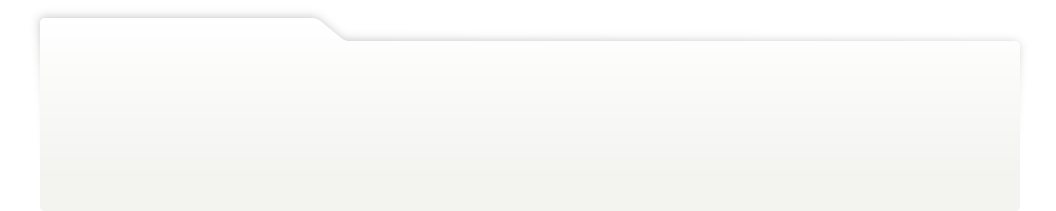
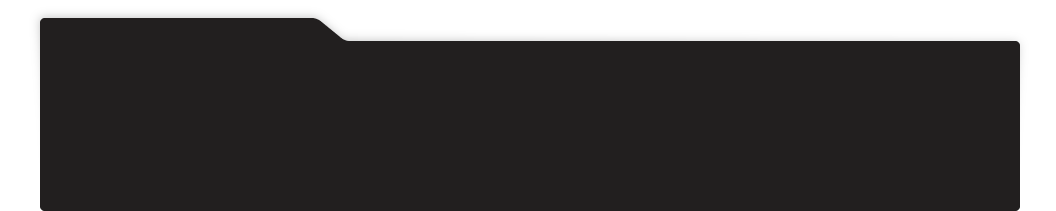
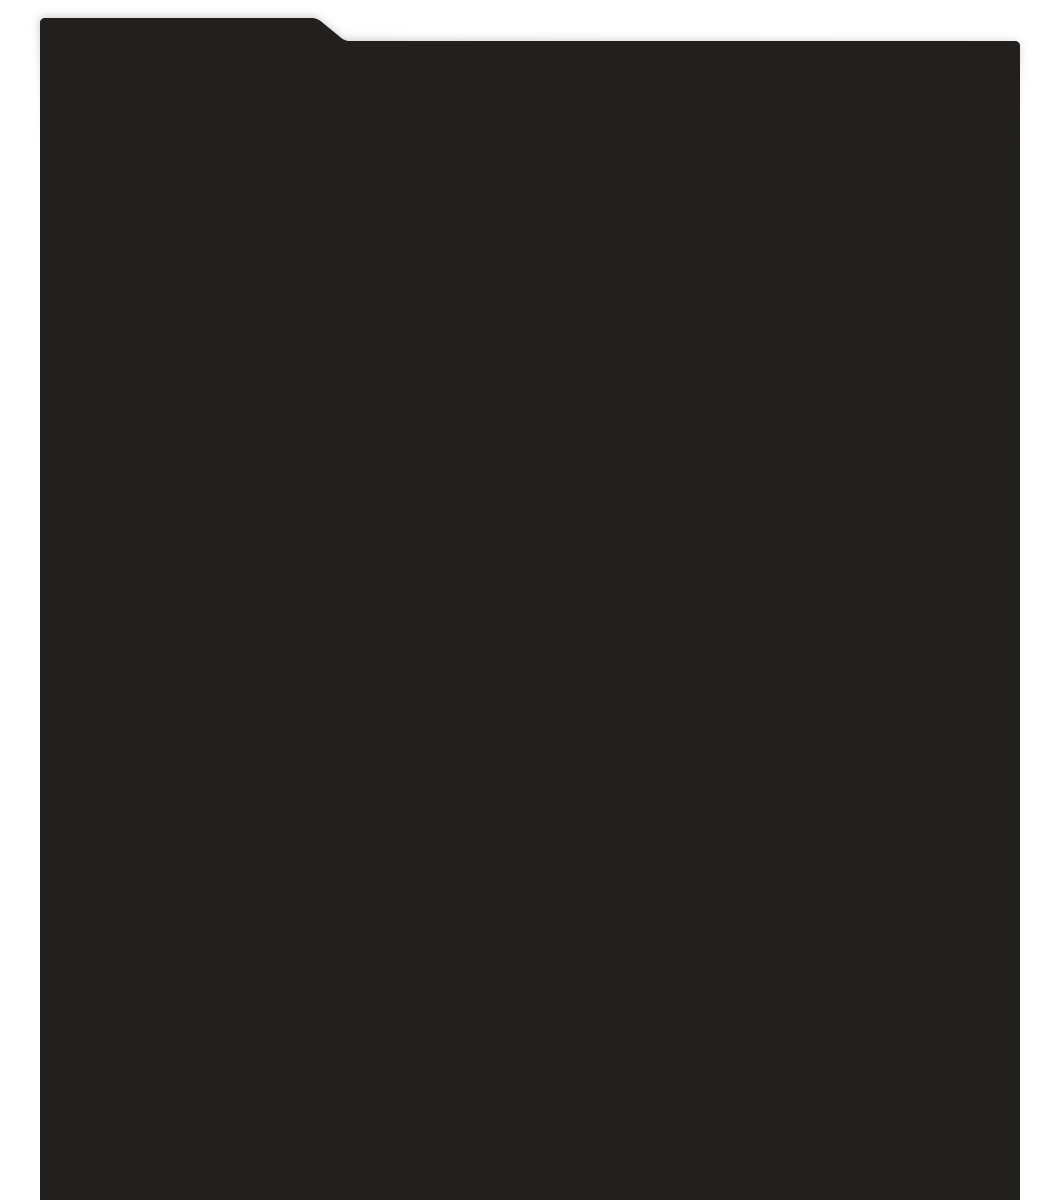
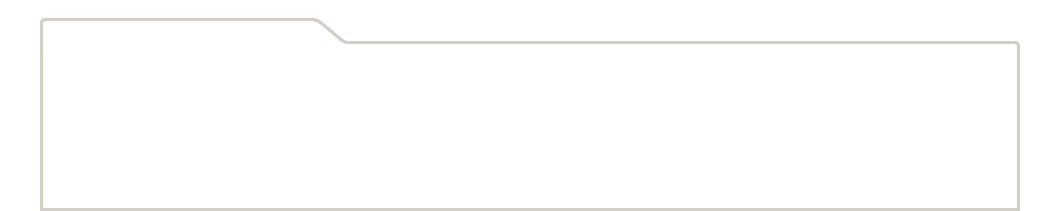
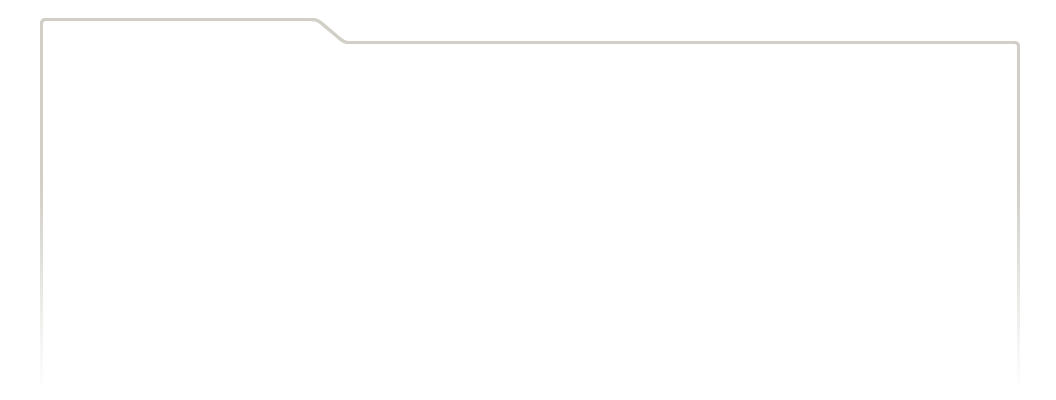
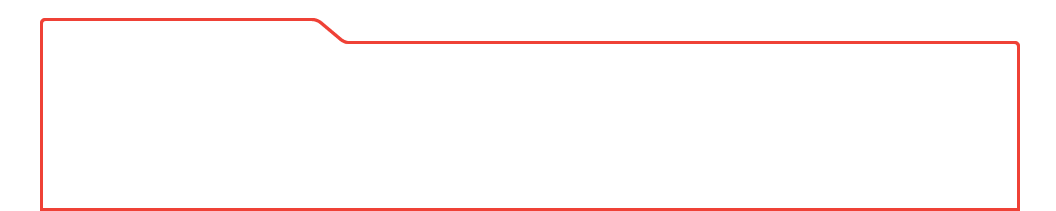
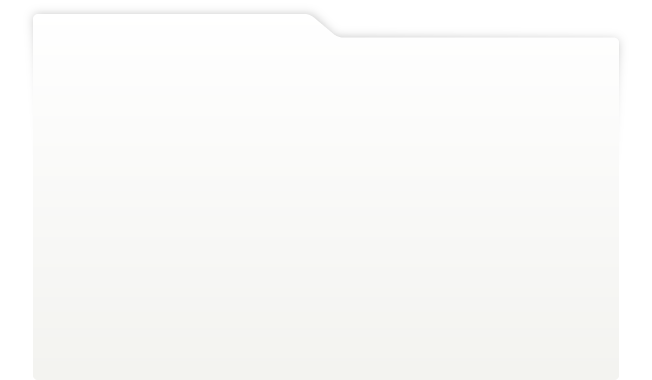
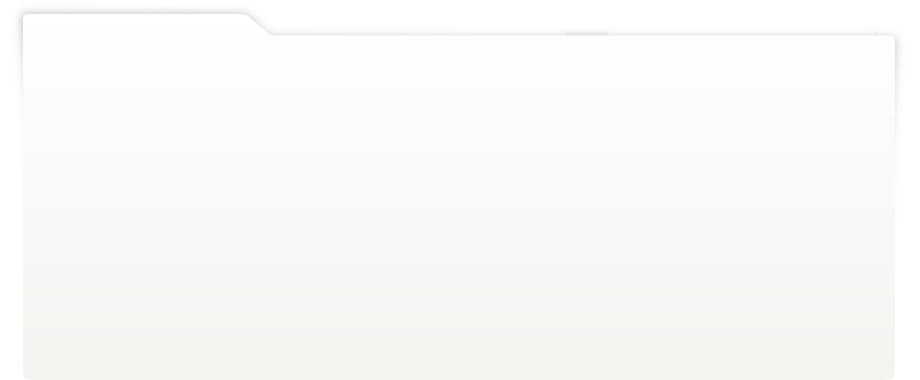
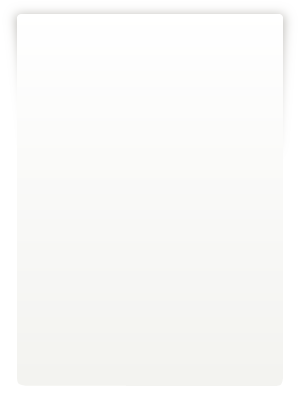
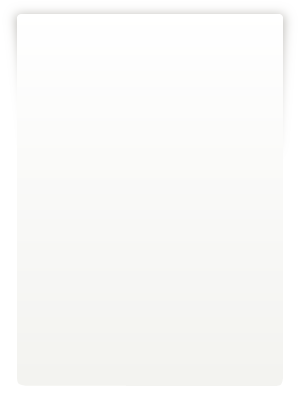
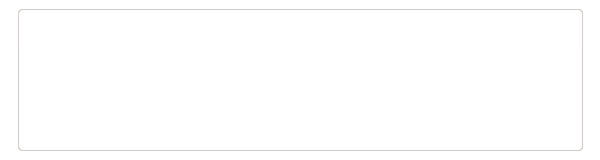
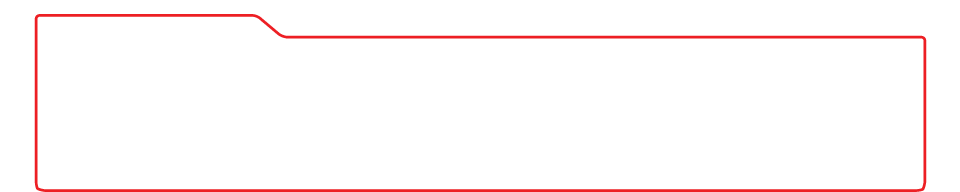
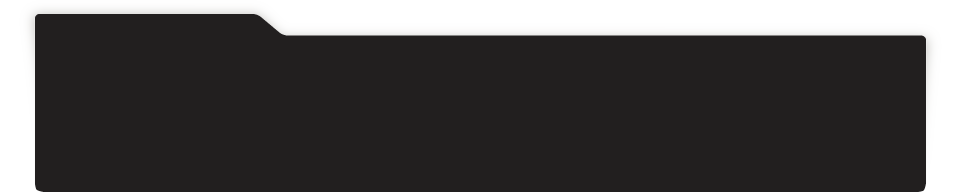
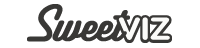
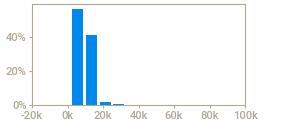
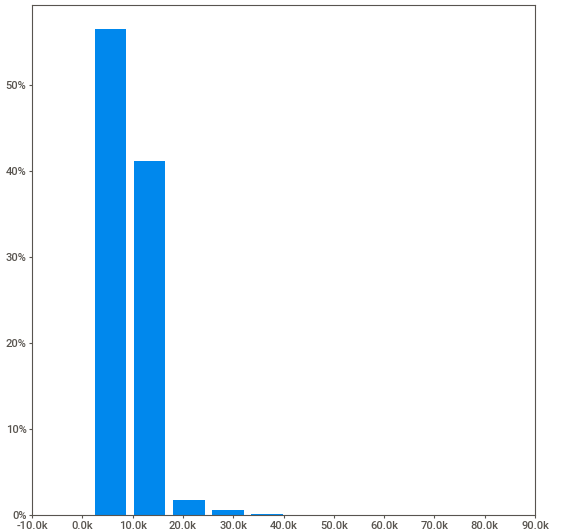
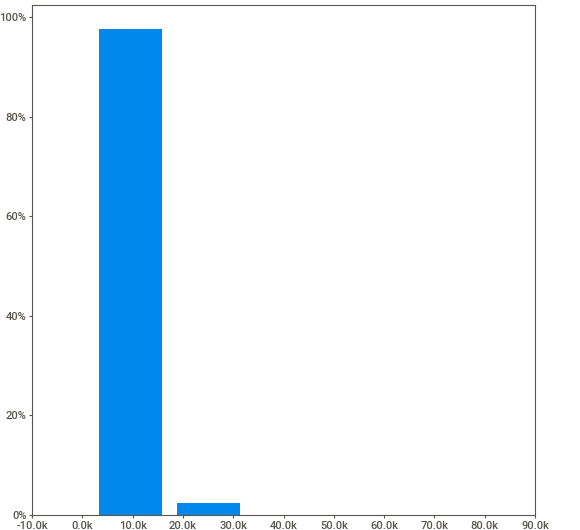
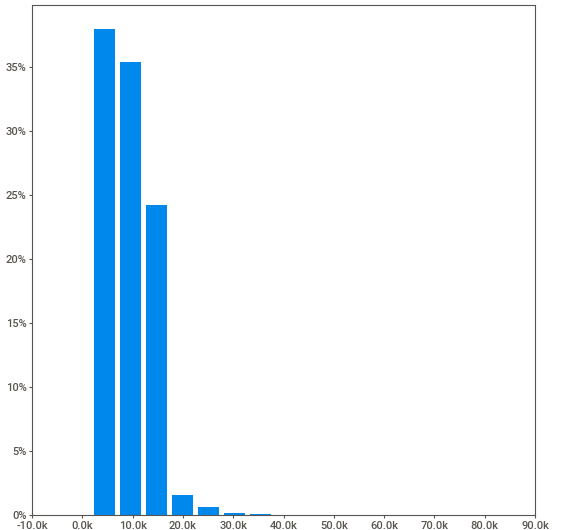
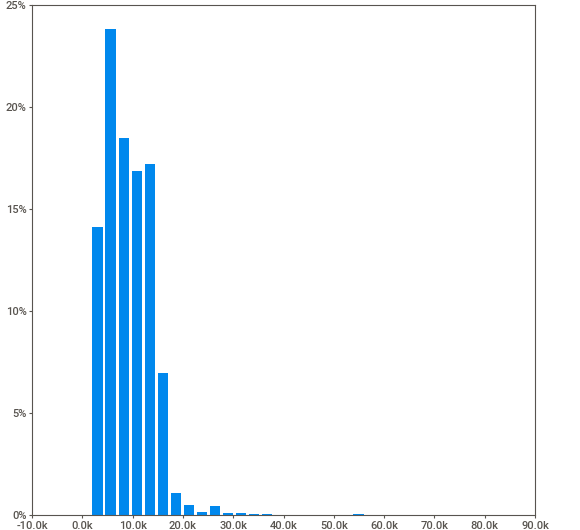
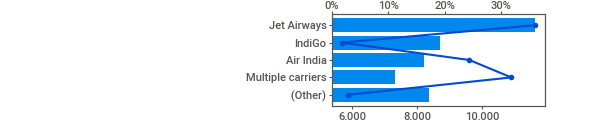
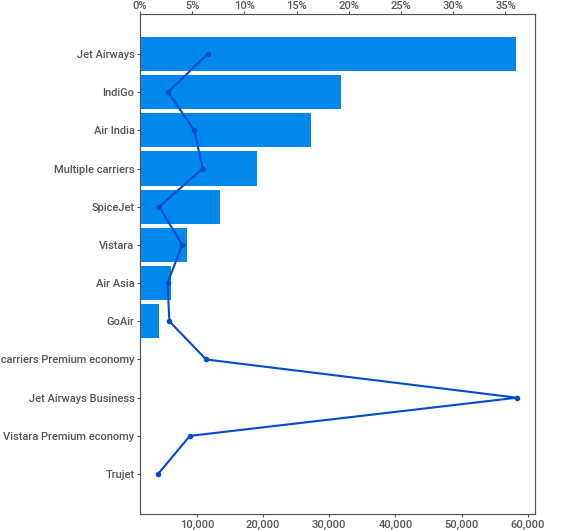
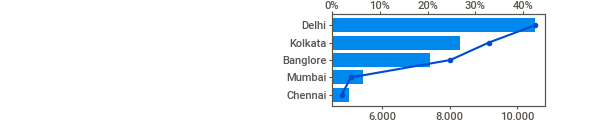
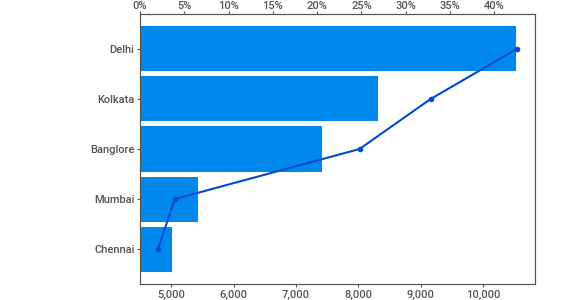
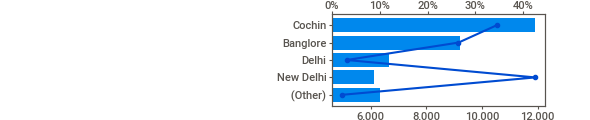
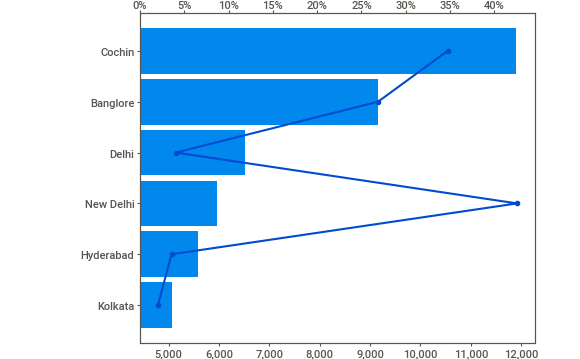
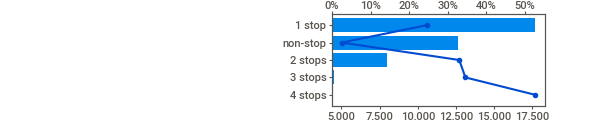
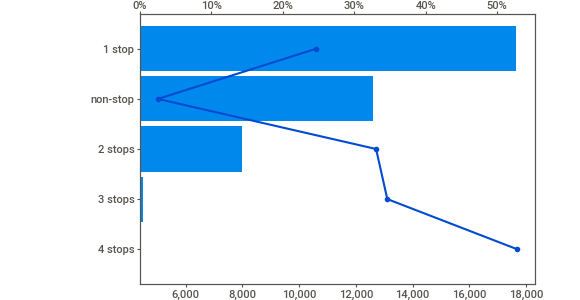
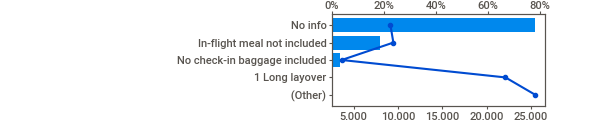
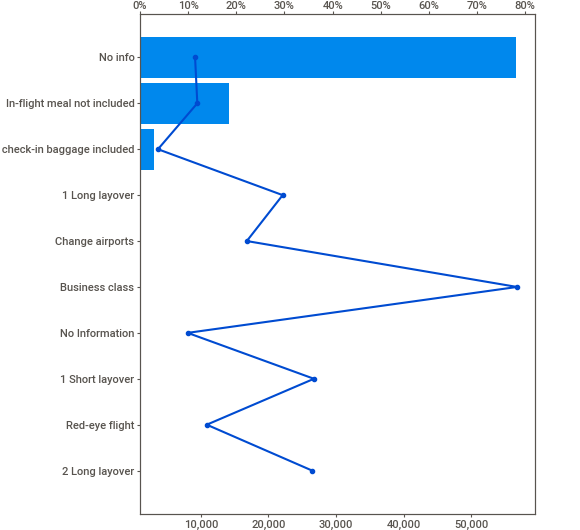
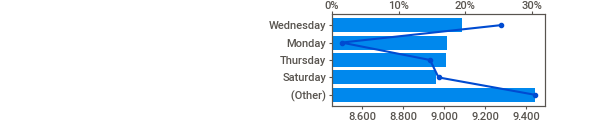
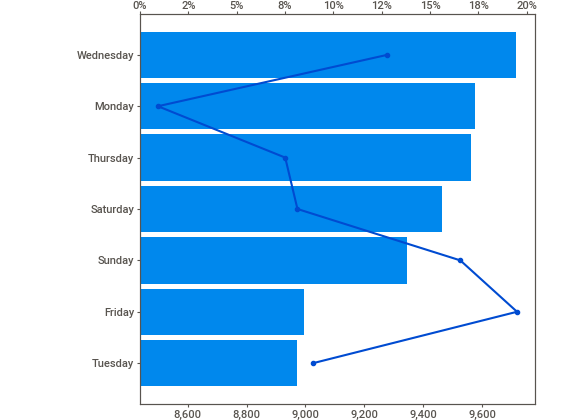
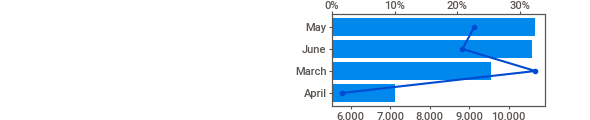
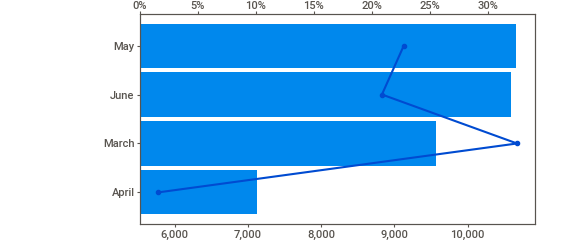
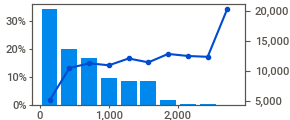
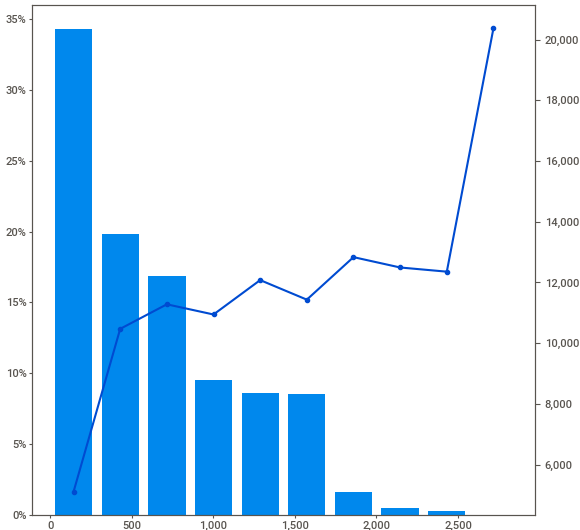
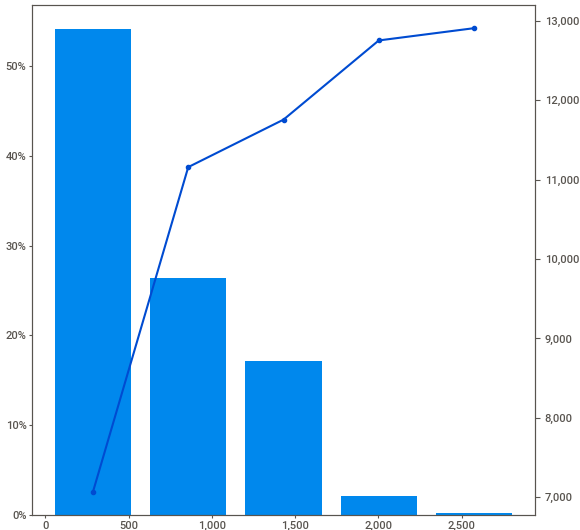
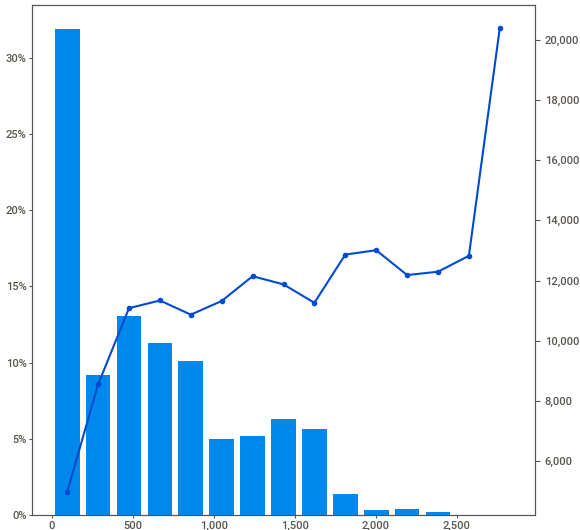
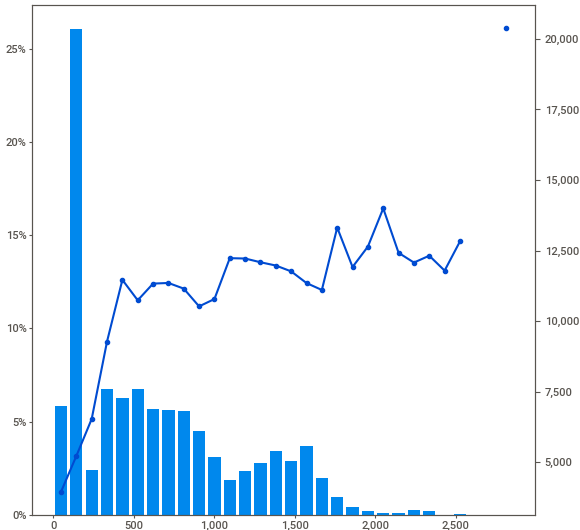
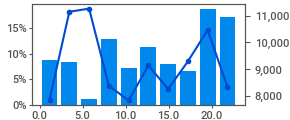
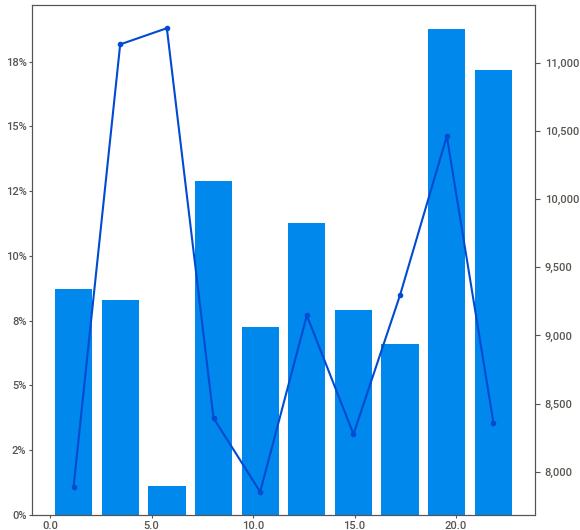
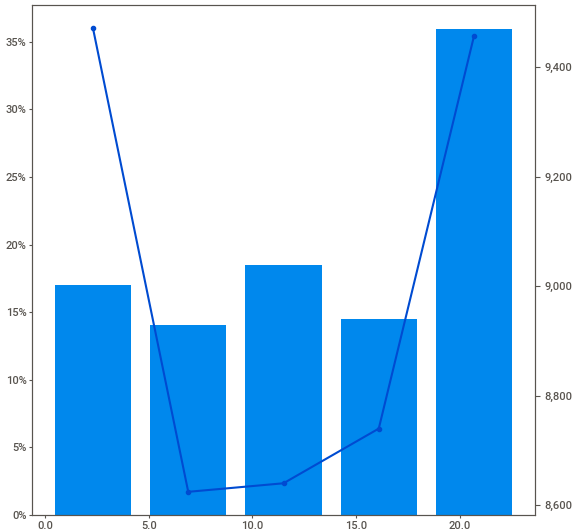
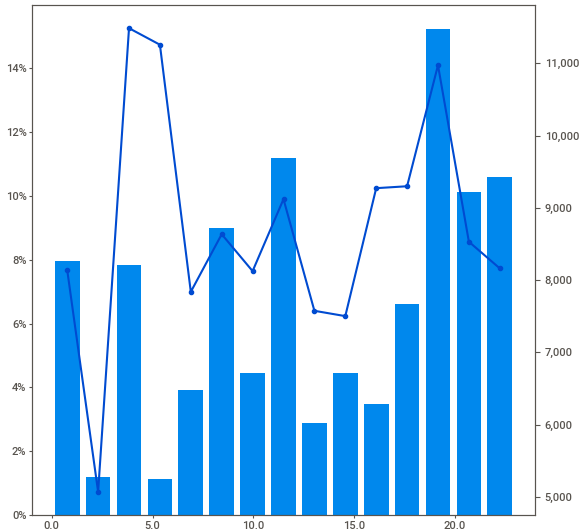
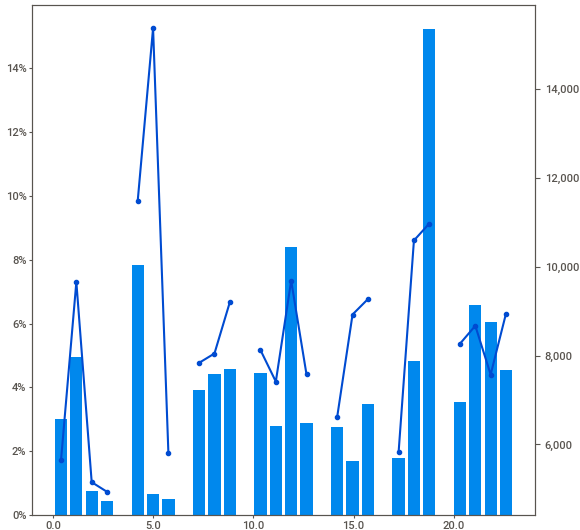
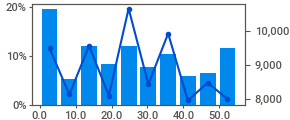
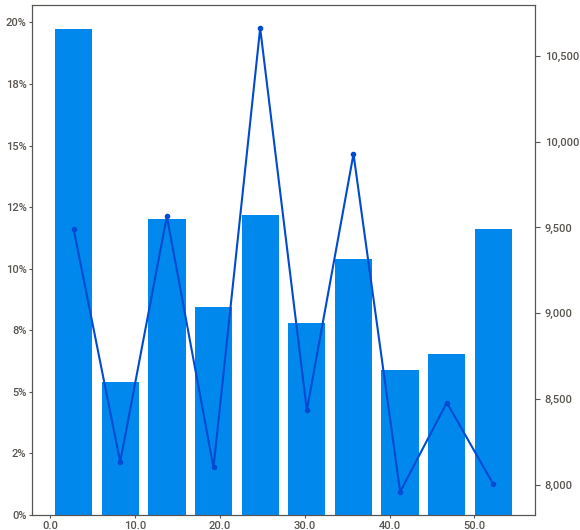
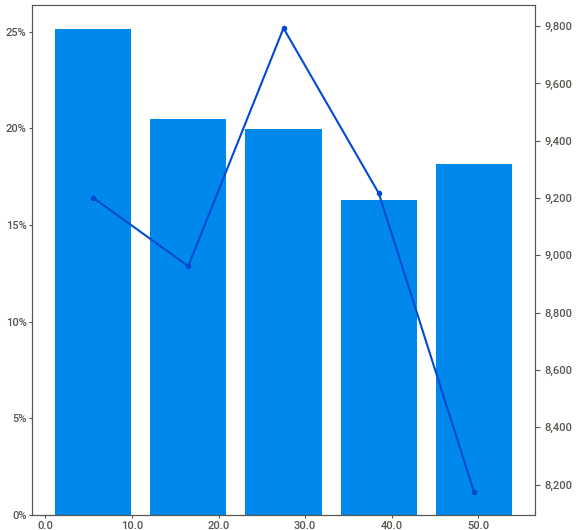
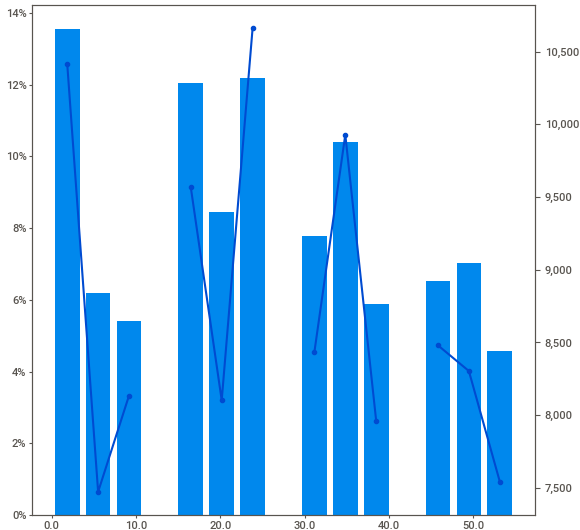
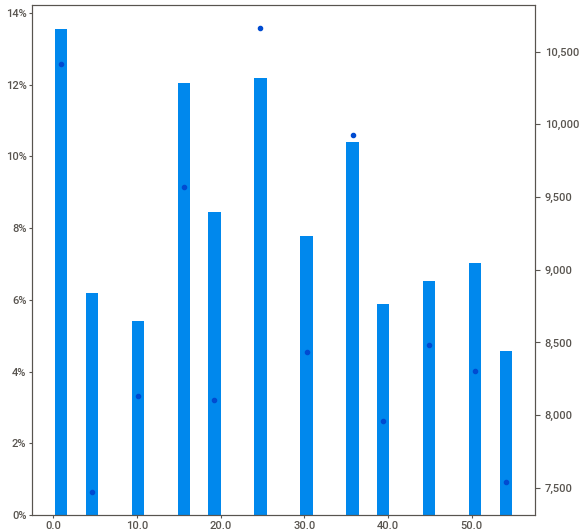
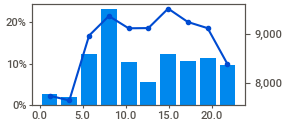
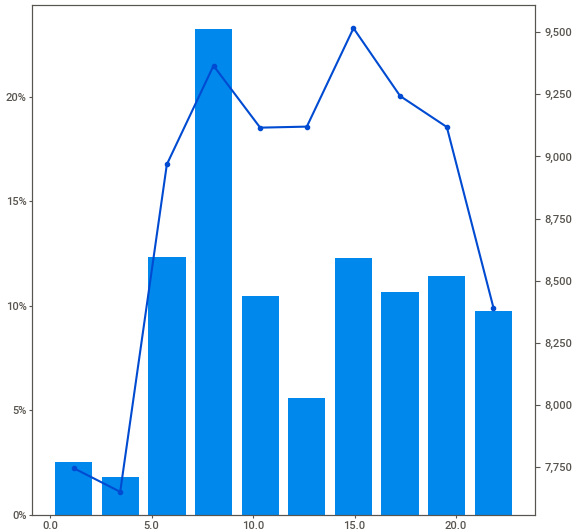
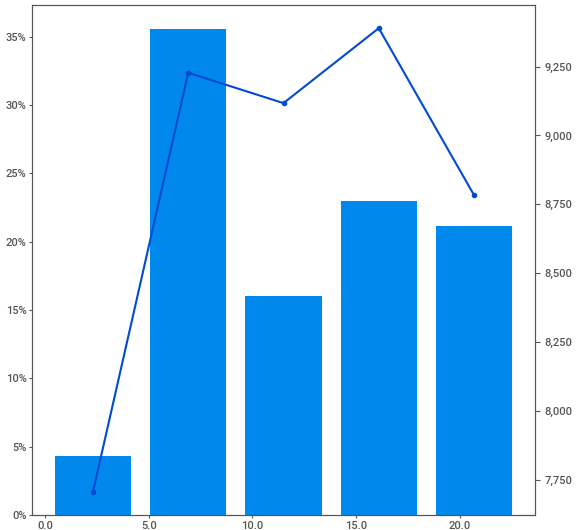
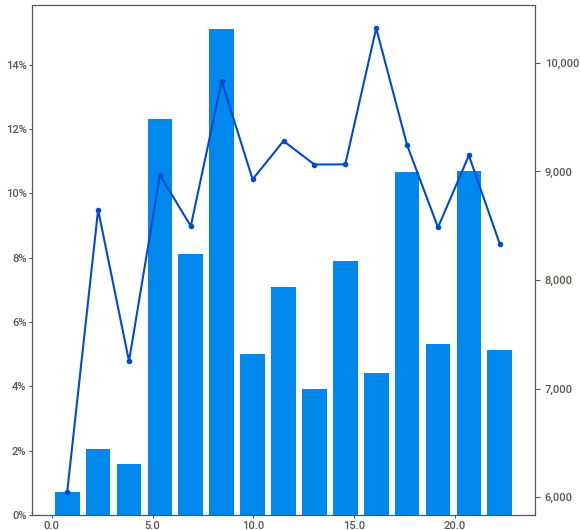
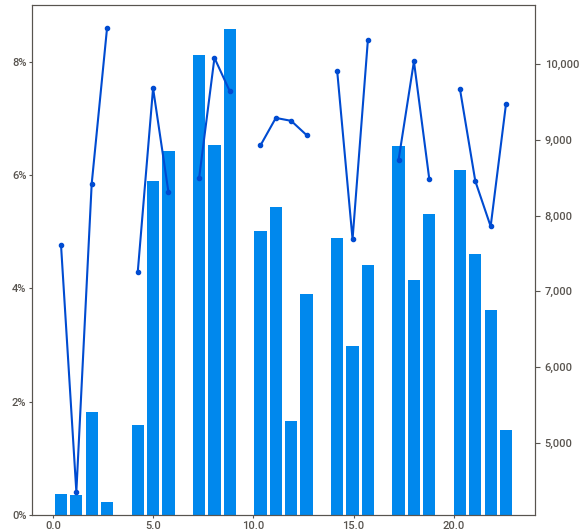
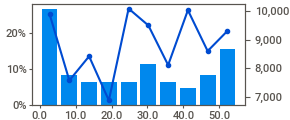
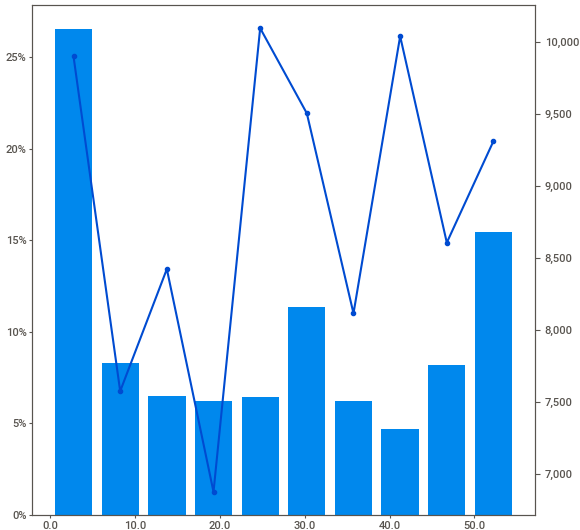
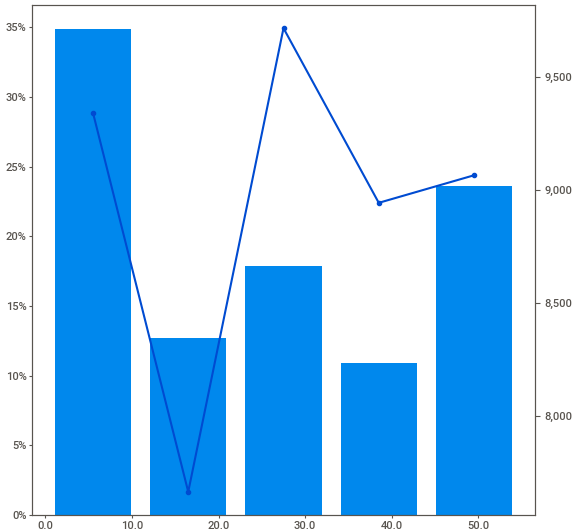
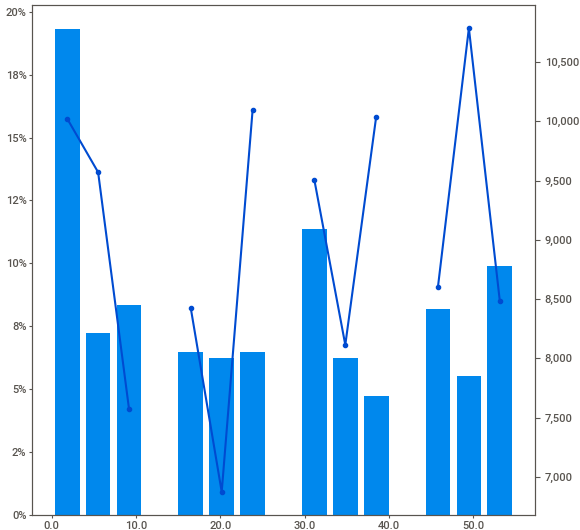
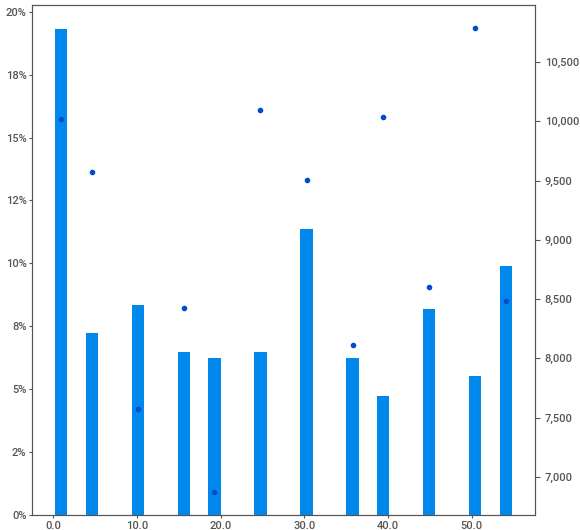
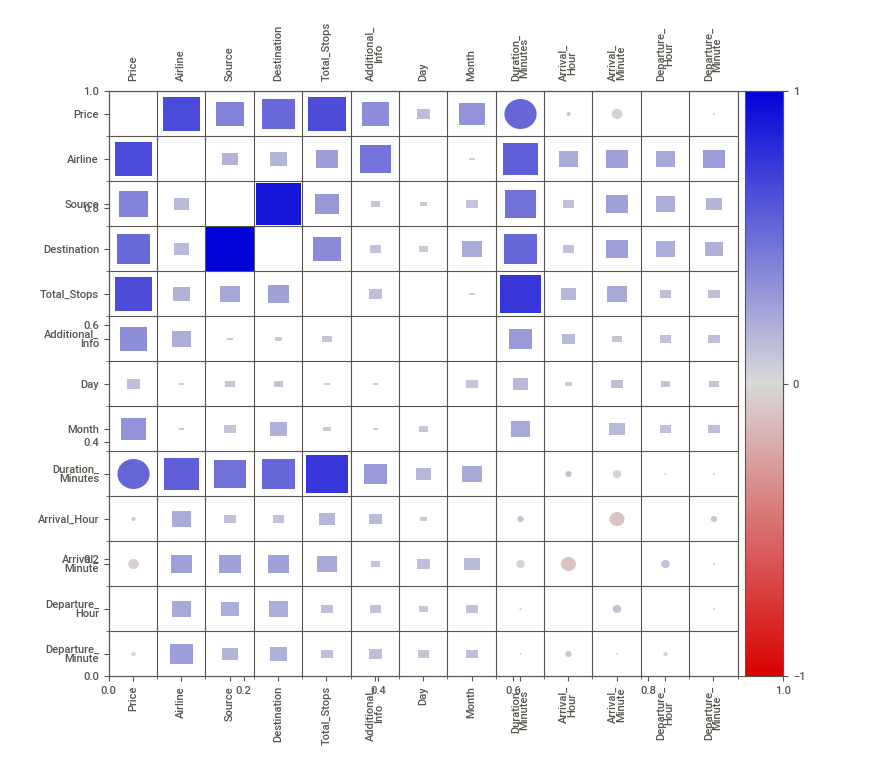
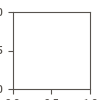

In [25]:
report.show_notebook()

In [29]:
num,cat=numericla_categorical(df)

In [30]:
correlation_matrix=df[num].corr()
correlation_matrix

,Price,Duration_Minutes,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Price,1.000000,0.506369,0.024264,-0.086155,0.006819,-0.024492
Duration_Minutes,0.506369,1.000000,0.051434,-0.069655,0.002001,-0.018940
Arrival_Hour,0.024264,0.051434,1.000000,-0.154362,0.005215,0.043054
Arrival_Minute,-0.086155,-0.069655,-0.154362,1.000000,0.067909,-0.017594
Departure_Hour,0.006819,0.002001,0.005215,0.067909,1.000000,-0.024806
Departure_Minute,-0.024492,-0.018940,0.043054,-0.017594,-0.024806,1.000000


here we can see the year not affacting or showing the relationship with the rest futurre so we drop this column from the dataset

<Axes: >

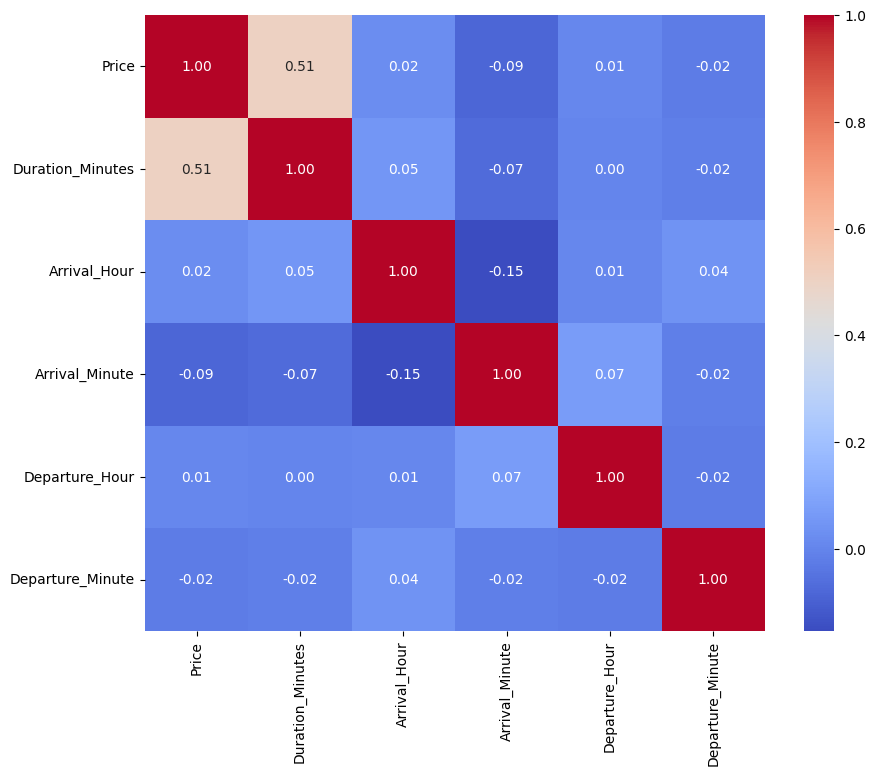

In [31]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


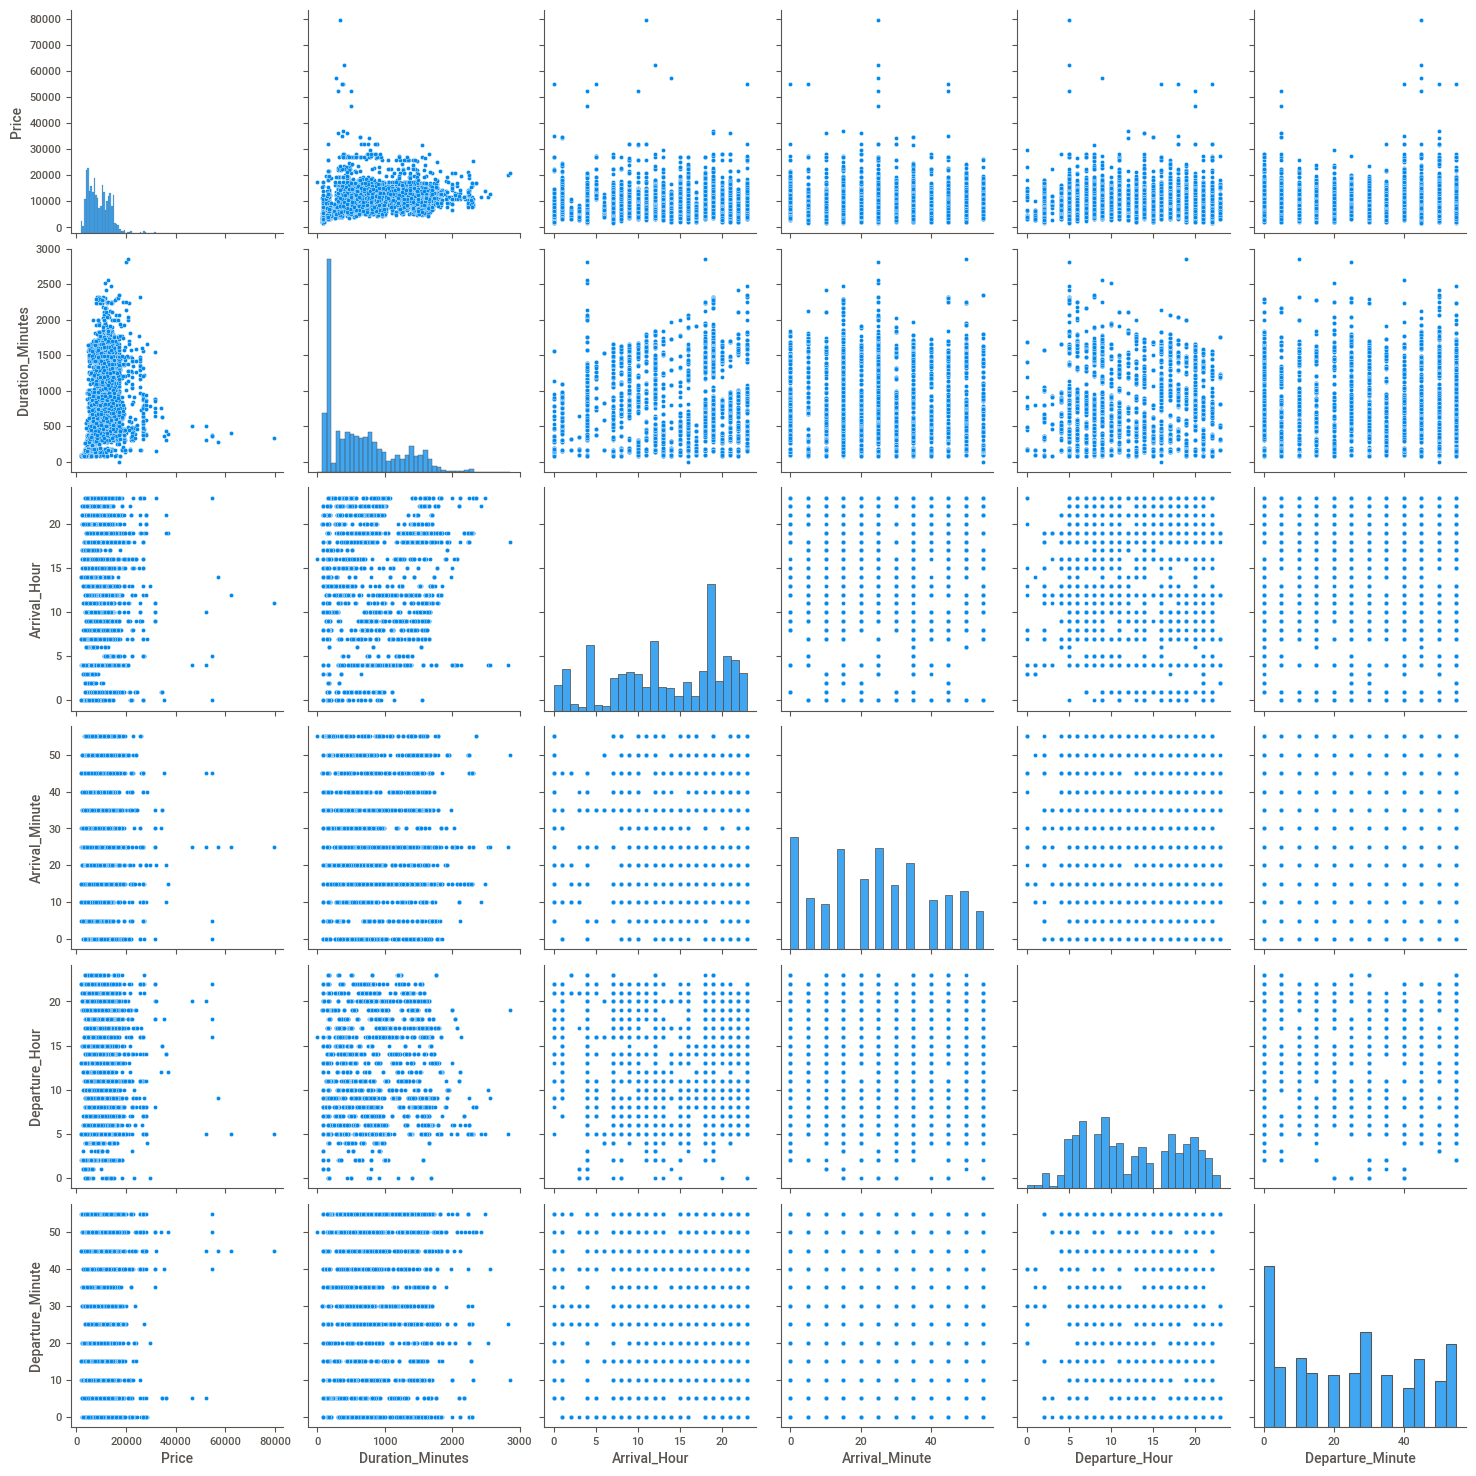

In [28]:
sns.pairplot(df[num])

### Analysing The categorical data

<Axes: xlabel='Price', ylabel='Airline'>

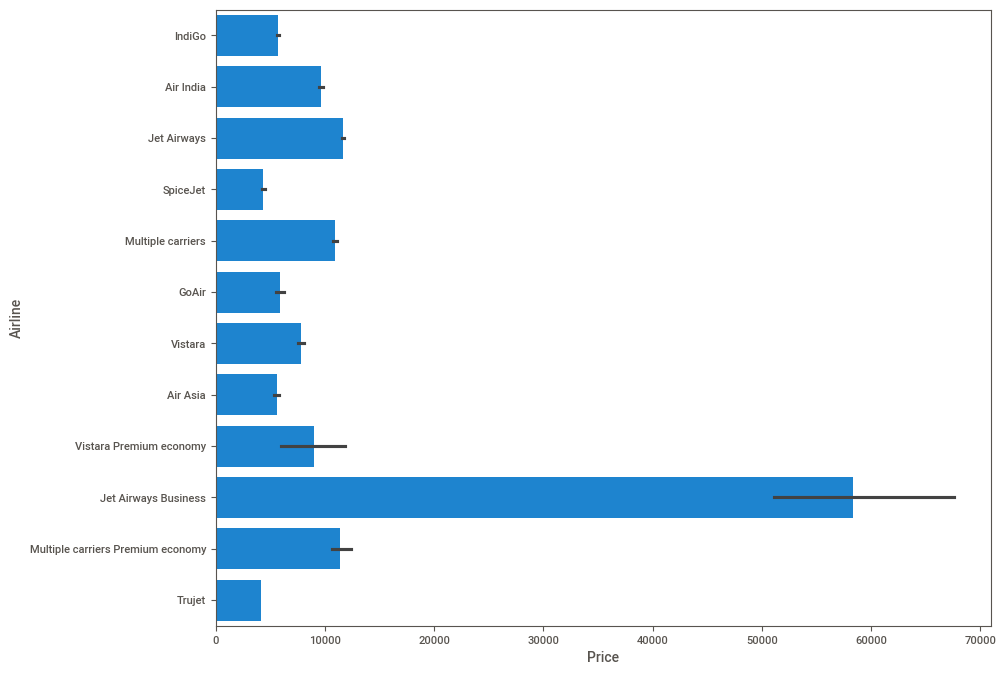

In [29]:
plt.figure(figsize=(10, 8))  # Adjust the figur size here

sns.barplot(df,y='Airline',x='Price')

In [30]:
grouped_agg=df.groupby('Airline')['Price'].agg(['mean','count','sum'])
grouped_agg.head()

,mean,count,sum
Airline,,,
Air Asia,5590.260188,319,1783293
Air India,9611.210616,1752,16838841
GoAir,5861.056701,194,1137045
IndiGo,5673.682903,2053,11648071
Jet Airways,11643.923357,3849,44817461


<Axes: xlabel='count', ylabel='Airline'>

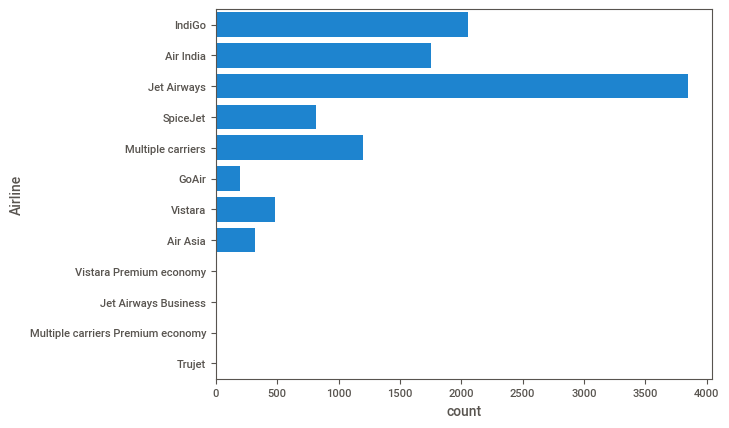

In [31]:
sns.countplot(df,y='Airline')

<Axes: xlabel='Price', ylabel='Additional_Info'>

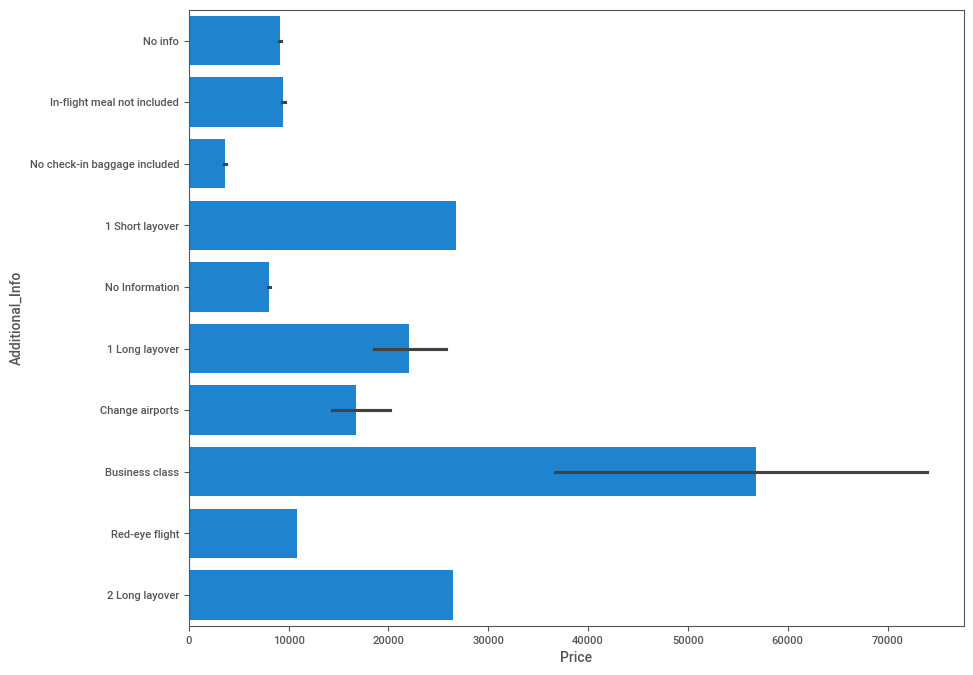

In [32]:
plt.figure(figsize=(10, 8))  # Adjust the figur size here

sns.barplot(df,x='Price',y='Additional_Info')

<Axes: xlabel='Price', ylabel='Total_Stops'>

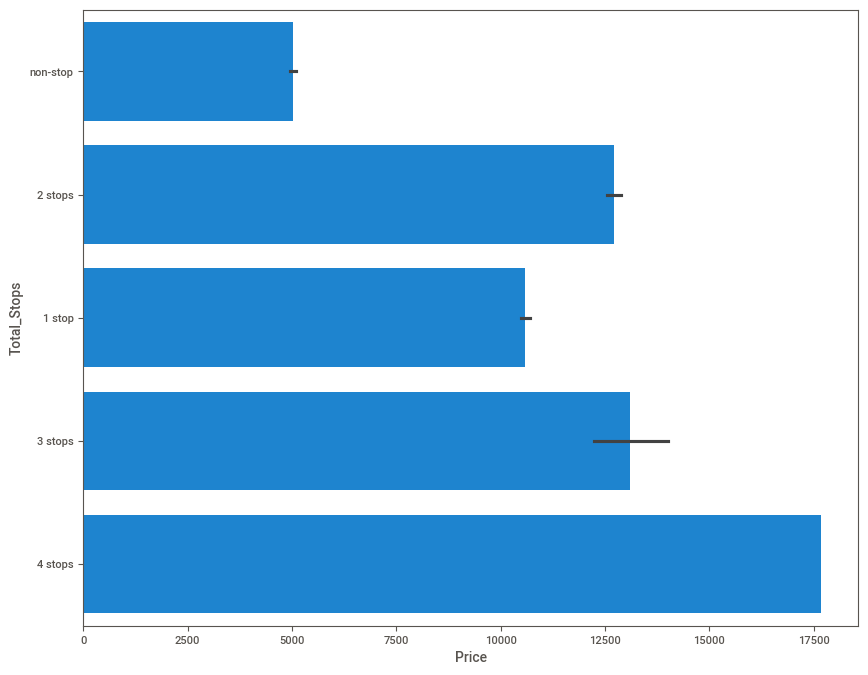

In [33]:
plt.figure(figsize=(10, 8))  # Adjust width and height of the figure
sns.barplot(df,x='Price',y='Total_Stops',)

<Axes: xlabel='Total_Stops', ylabel='count'>

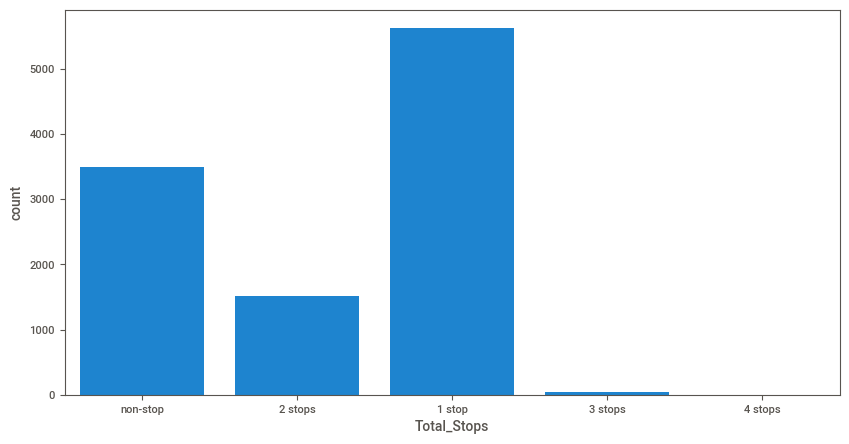

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Total_Stops')


<Axes: xlabel='Destination', ylabel='Price'>

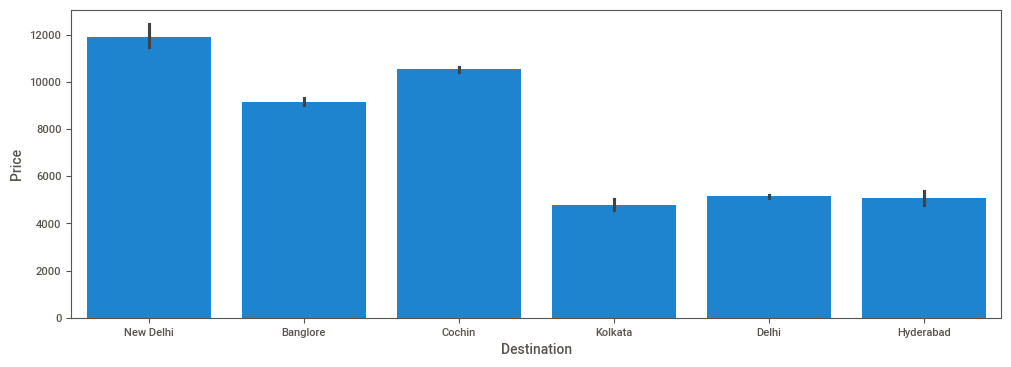

In [35]:
plt.figure(figsize=(12,4))
sns.barplot(df,x='Destination',y='Price')

<Axes: xlabel='Source', ylabel='Price'>

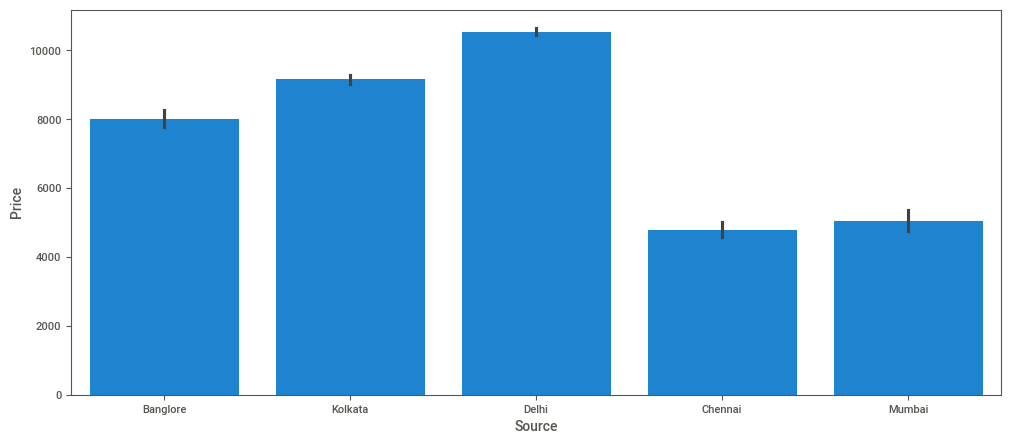

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(df,x='Source',y='Price')

<Axes: xlabel='Source', ylabel='count'>

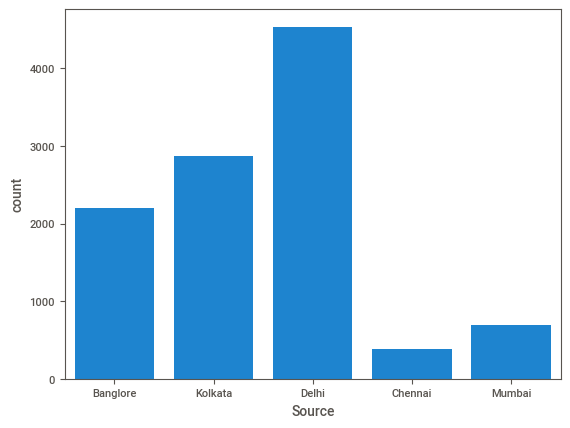

In [37]:
sns.countplot(df,x='Source')

<Axes: xlabel='Day', ylabel='Price'>

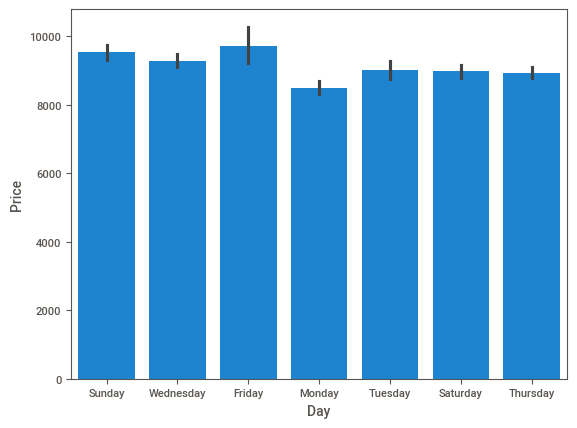

In [38]:
sns.barplot(df,x='Day',y='Price')

<Axes: xlabel='Month', ylabel='Price'>

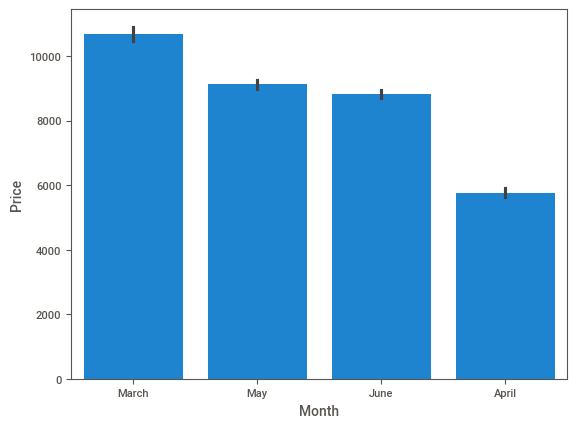

In [39]:
sns.barplot(df,x='Month',y='Price')

## Analysisng the numerical data

<Axes: xlabel='Price'>

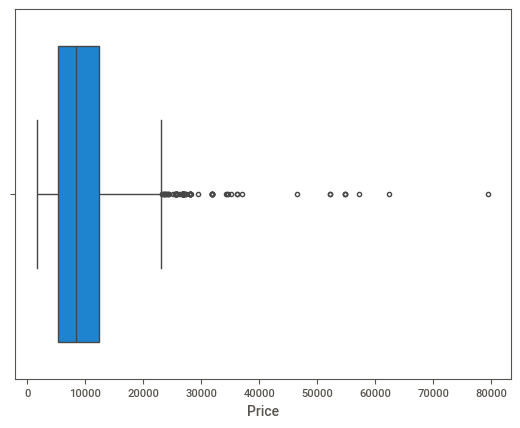

In [40]:
sns.boxplot(df,x='Price')

<Axes: xlabel='Duration_Minutes'>

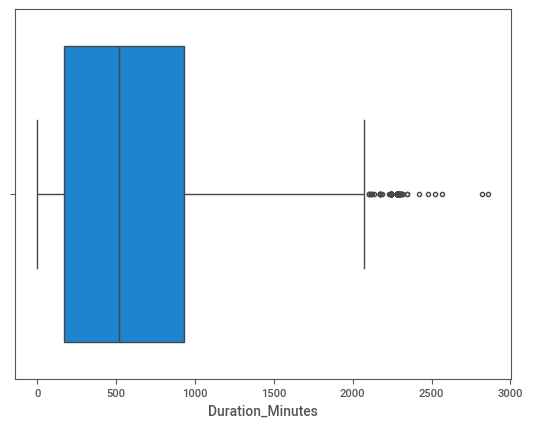

In [41]:
sns.boxplot(df,x='Duration_Minutes')

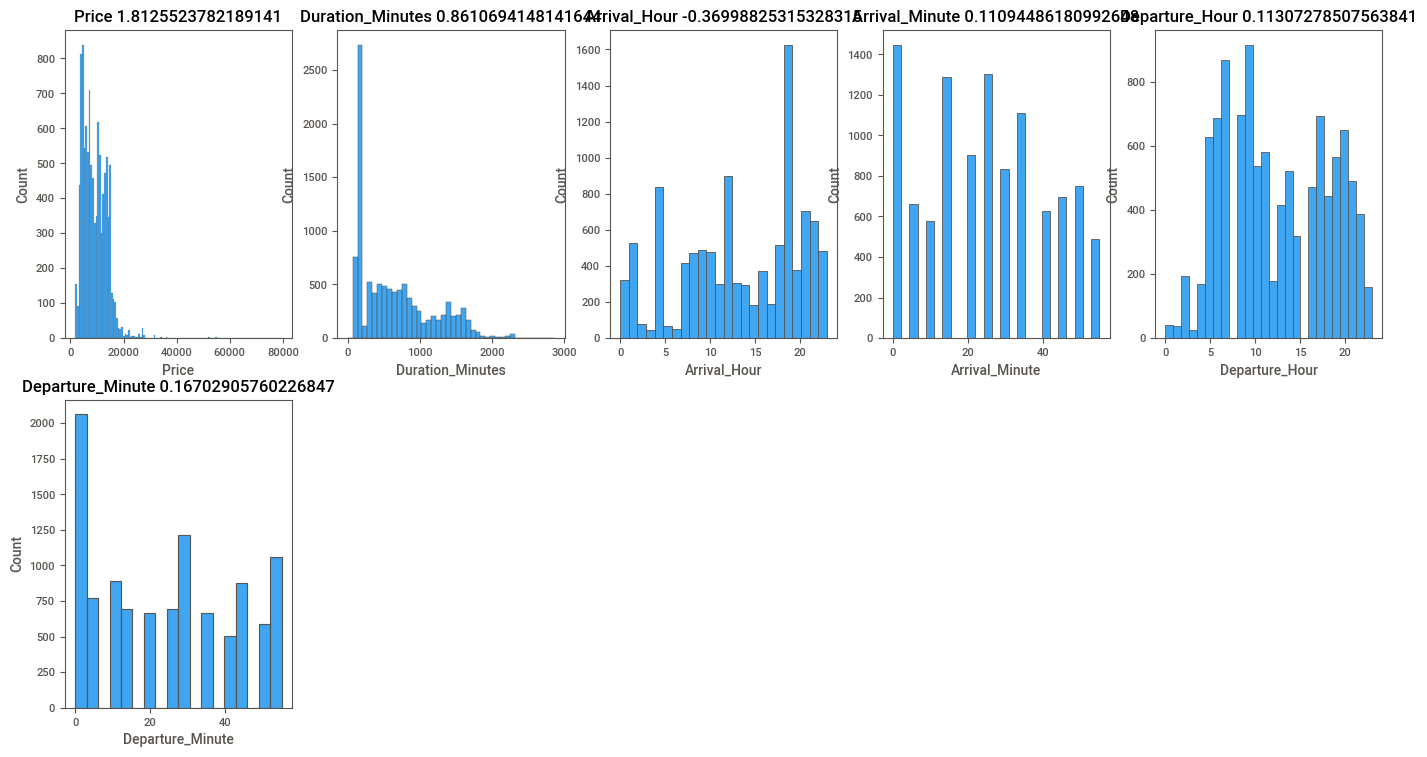

In [42]:
k=0
plt.figure(figsize=(17,28))
for col in num:
    k=k+1
    plt.subplot(6, 5,k)
    sns.histplot(df[col])
    plt.title(col+' '+str(df[col].skew()))

<ipython-input-43-744b48d704d3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-43-744b48d704d3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-43-744b48d704d3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

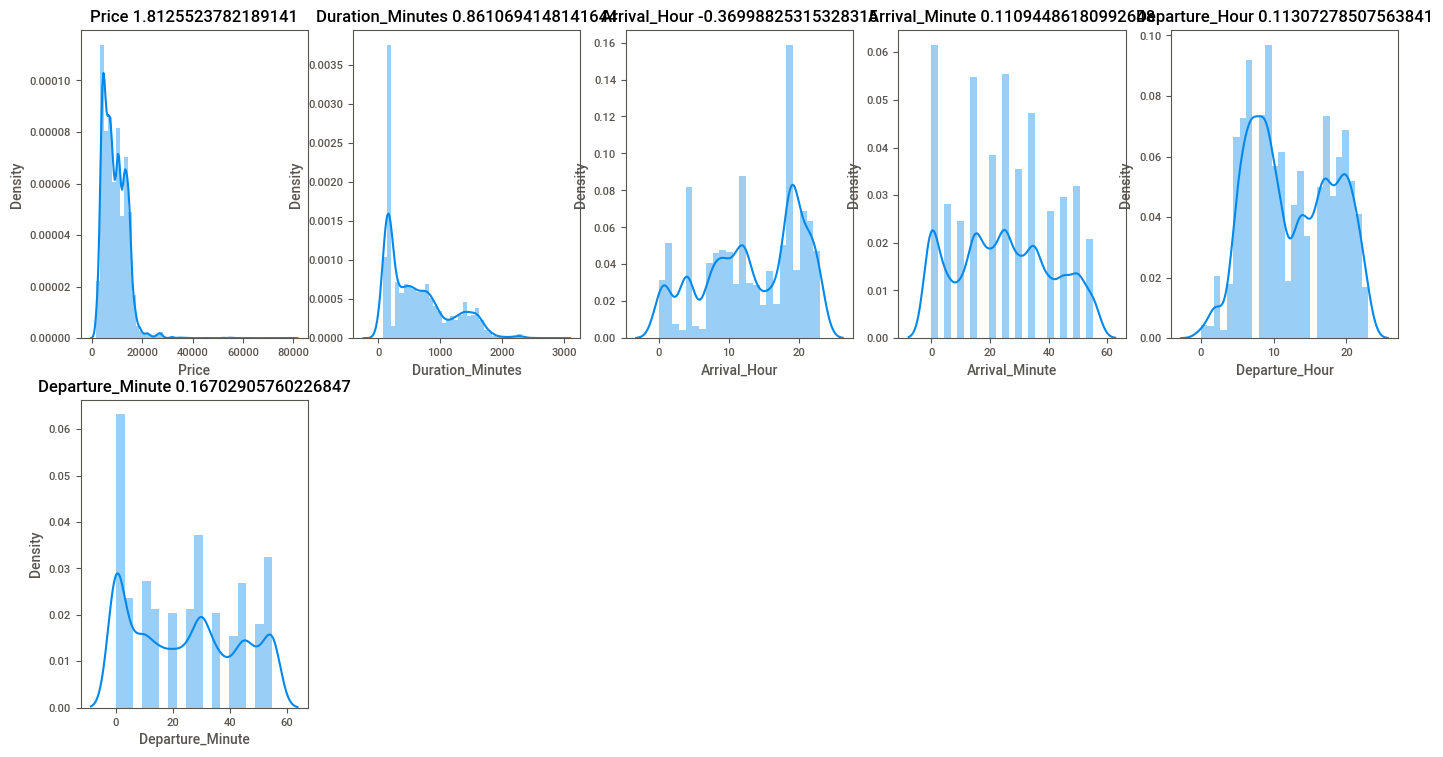

In [43]:
k=0
plt.figure(figsize=(17,28))
for col in num :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(df[col])
    plt.title(col+' '+str(df[col].skew()))

In [44]:
def num_cat(df):
    numerical = [col for col in df.columns if df[col].dtype != 'object']
    categorical = [col for col in df.columns if df[col].dtype == 'object']
    return numerical,categorical
# categorical = [col for col in df.columns if df[col].dtype == 'object']
# numerical = [col for col in df.columns if df[col].dtype != 'object']
# print(categorical)
# print(numerical)

In [45]:
num,cat=num_cat(df)

In [46]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

# Encoding the data some categorical feature convert into the numerical  

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

class FlightDataEncoding:
    """
    A class to handle various encoding techniques for flight data.

    This class provides methods to perform label encoding, one-hot encoding,
    ordinal encoding, and column removal on a given DataFrame.
    """

    def __init__(self, df):
        """
        Initialize the FlightDataEncoding with a DataFrame.

        Parameters:
            df (pd.DataFrame): The input DataFrame containing flight data.
        """
        self.df = df

    def label_encode(self, columns):
        """
        Apply label encoding to specified categorical columns.

        Label encoding converts each unique category in a column into an integer value.

        Parameters:
            columns (list): List of column names to label encode.

        Returns:
            pd.DataFrame: Updated DataFrame with label-encoded columns.
        """
        # Initialize the LabelEncoder
        le = LabelEncoder()

        # Loop through each specified column
        for col in columns:
            if self.df[col].dtype == 'object':  # Ensure column has categorical data
                # Apply label encoding
                self.df[col] = le.fit_transform(self.df[col])
            else:
                # Raise an error if the column is not categorical
                raise ValueError(f"Column '{col}' is not categorical and cannot be label encoded.")

        return self.df

    def one_hot_encode(self, columns):
        """
        Apply one-hot encoding to specified categorical columns.

        One-hot encoding creates new binary columns for each category in the original column.

        Parameters:
            columns (list): List of column names to one-hot encode.

        Returns:
            pd.DataFrame: Updated DataFrame with one-hot encoded columns.
        """
        # Initialize the OneHotEncoder
        ohe = OneHotEncoder()

        # Perform one-hot encoding
        encoded_array = ohe.fit_transform(self.df[columns]).toarray()

        # Create a new DataFrame with one-hot encoded columns
        encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(columns))

        # Merge the one-hot encoded columns back into the original DataFrame
        # self.df = pd.concat([self.df.drop(columns, axis=1), encoded_df], axis=1)

        return encoded_df

    def ordinal_encode(self, columns):
        """
        Apply ordinal encoding to specified categorical columns.

        Ordinal encoding assigns a unique integer to each category based on the order
        they appear in the data.

        Parameters:
            columns (list): List of column names to ordinal encode.

        Returns:
            pd.DataFrame: Updated DataFrame with ordinal-encoded columns.
        """
        # Initialize the OrdinalEncoder
        ord_enc = OrdinalEncoder()

        # Loop through each specified column
        for col in columns:
            if self.df[col].dtype == 'object':  # Ensure column has categorical data
                # Apply ordinal encoding
                self.df[col] = ord_enc.fit_transform(self.df[[col]])
            else:
                # Raise an error if the column is not categorical
                raise ValueError(f"Column '{col}' is not categorical and cannot be ordinal encoded.")

        return self.df[columns]

    def drop_columns(self, columns):
        """
        Drop specified columns from the DataFrame.

        This method removes unwanted or redundant columns from the DataFrame.

        Parameters:
            columns (list): List of column names to be dropped.

        Returns:
            pd.DataFrame: Updated DataFrame with specified columns removed.
        """
        # Drop the specified columns from the DataFrame
        self.df.drop(columns=columns, inplace=True)
        return self.df


In [33]:
# data = {
#     "Airline": ["Indigo", "Air India", "SpiceJet", "Indigo", "Air India"],
#     "Source": ["Delhi", "Mumbai", "Bangalore", "Delhi", "Kolkata"],
#     "Destination": ["Mumbai", "Delhi", "Delhi", "Bangalore", "Mumbai"],
#     "Class": ["Economy", "Business", "Economy", "Economy", "Business"],
#     "Total_Stops": [1, 2, 0, 1, 2],
#     "Additional_Info": ["No Info", "No Info", "No Info", "No Info", "No Info"]
# }

# df2 = pd.DataFrame(data)

In [34]:
# dd=FlightDataEncoding(df2)

In [35]:
# oo=dd.one_hot_encode(['Airline', 'Source', 'Destination', 'Class'])
# oo

In [36]:
# ff=dd.ordinal_encode(['Additional_Info'])
# ff

In [37]:
encoded=FlightDataEncoding(df)

In [38]:
one_df=encoded.one_hot_encode(['Airline', 'Source', 'Destination', 'Day', 'Month'])
one_df

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_June,Month_March,Month_May
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air Asia                           10683 non-null  float64
 1   Airline_Air India                          10683 non-null  float64
 2   Airline_GoAir                              10683 non-null  float64
 3   Airline_IndiGo                             10683 non-null  float64
 4   Airline_Jet Airways                        10683 non-null  float64
 5   Airline_Jet Airways Business               10683 non-null  float64
 6   Airline_Multiple carriers                  10683 non-null  float64
 7   Airline_Multiple carriers Premium economy  10683 non-null  float64
 8   Airline_SpiceJet                           10683 non-null  float64
 9   Airline_Trujet                             10683 non-null  float64
 10  Airline_Vistara       

In [40]:
ord_df=encoded.ordinal_encode(['Total_Stops','Additional_Info'])
ord_df

,Total_Stops,Additional_Info
0,4.0,8.0
1,1.0,8.0
2,1.0,8.0
3,0.0,8.0
4,0.0,8.0
...,...,...
10678,4.0,8.0
10679,4.0,8.0
10680,4.0,8.0
10681,4.0,8.0


In [42]:
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total_Stops      10683 non-null  float64
 1   Additional_Info  10683 non-null  float64
dtypes: float64(2)
memory usage: 167.0 KB


In [43]:
new_df=pd.concat([df,ord_df,one_df],axis=1)
new_df.drop(['Airline', 'Source', 'Destination', 'Day', 'Month'],axis=1,inplace=True) # here cat means list of categorical columns
new_df.head()

,Total_Stops,Additional_Info,Price,Duration_Minutes,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Stops,Additional_Info,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_June,Month_March,Month_May
0,4.0,8.0,3897,170,1,10,22,20,4.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,8.0,7662,445,13,15,5,50,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,8.0,13882,1140,4,25,9,25,1.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,8.0,6218,325,23,30,18,5,0.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,8.0,13302,285,21,35,16,50,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  float64
 1   Additional_Info                            10683 non-null  float64
 2   Price                                      10683 non-null  int64  
 3   Duration_Minutes                           10683 non-null  int64  
 4   Arrival_Hour                               10683 non-null  int64  
 5   Arrival_Minute                             10683 non-null  int64  
 6   Departure_Hour                             10683 non-null  int64  
 7   Departure_Minute                           10683 non-null  int64  
 8   Total_Stops                                10683 non-null  float64
 9   Additional_Info                            10683 non-null  float64
 10  Airline_Air Asia      

In [45]:
# df_new = pd.concat([df.drop(['Airline','Source','Destination','Day','Month','Additional_Info'], axis=1), encoded_df], axis=1)
# df_new.head()

### Data Splitting


In [46]:
X=new_df.drop('Price',axis=1)
y=new_df['Price']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [48]:
X_train.head()

,Total_Stops,Additional_Info,Duration_Minutes,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Stops,Additional_Info,Airline_Air Asia,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_June,Month_March,Month_May
8990,1.0,8.0,605,16,35,6,30,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3684,0.0,5.0,1505,12,35,11,30,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1034,0.0,8.0,380,22,5,15,45,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3909,0.0,8.0,765,1,35,12,50,0.0,8.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3088,1.0,8.0,1560,19,15,17,15,1.0,8.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
X_train.shape

(8546, 43)

In [50]:
X_test.head()

,Total_Stops,Additional_Info,Duration_Minutes,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Stops,Additional_Info,Airline_Air Asia,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_June,Month_March,Month_May
6076,0.0,5.0,750,18,15,5,45,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3544,0.0,8.0,540,19,35,10,35,0.0,8.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7313,0.0,8.0,345,19,50,14,5,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5032,4.0,8.0,140,17,5,14,45,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2483,0.0,5.0,335,4,25,22,50,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [51]:
X_test.shape

(2137, 43)

## 4. Model Selection


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures



In [53]:
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
    # 'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}


In [54]:
from os import pipe
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")


Linear Regression trained.
Support Vector Regression trained.
Decision Tree Regression trained.
Random Forest Regression trained.
Gradient Boosting Regression trained.
K-Nearest Neighbors Regression trained.


In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

def evaluate_models(X_train, y_train, models):
    """
    Evaluate multiple regression models and calculate performance metrics.

    Parameters:
        X_train (pd.DataFrame): Training feature set.
        y_train (pd.Series or pd.DataFrame): Training target variable.
        X_test (pd.DataFrame): Test feature set.
        y_test (pd.Series or pd.DataFrame): Test target variable.
        models (dict): Dictionary of model names and corresponding model objects.

    Returns:
        pd.DataFrame: A DataFrame containing evaluation metrics for each model.
    """
    # Initialize a list to store model performance results
    model_results = []

    # Iterate over each model in the dictionary
    if len(models) > 1:
        # raise ValueError("No models provided for evaluation.")
        for model_name, model in models.items():
            # Predict the target variable for the test set
            y_pred = model.predict(X_test)

            # Calculate evaluation metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            # train_score = model.score(X_train, y_train)

            # Append the results for the current model
            model_results.append({
                "Model": model_name,
                "Mean Squared Error (MSE)": mse,
                "R-squared (R2)": r2,
                "Mean Absolute Error (MAE)": mae,
                # "Training Score": train_score
            })

        # Convert the results into a DataFrame
        results_df = pd.DataFrame(model_results)
    elif len(models) == 1:
        # Access the model object within the dictionary
        model_name, model = list(models.items())[0]  # Get the first (and only) item

        y_pred = model.predict(X_test) # Use the model object
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        # train_score = model.score(X_train, y_train)
        results_df = pd.DataFrame({
                    "Model": model_name, # Added model_name to dict
                    "Mean Squared Error (MSE)": [mse], # Made values lists for one row DataFrame
                    "R-squared (R2)": [r2],
                    "Mean Absolute Error (MAE)": [mae],
                    # "Training Score": train_score
                })
    else:
         raise ValueError("No models provided for evaluation.")

    return results_df

In [68]:
mol_result=evaluate_models(X_train,y_train,models)
mol_result

,Model,Mean Squared Error (MSE),R-squared (R2),Mean Absolute Error (MAE)
0,Linear Regression,7.746229e+06,0.633990,1896.818302
1,Support Vector Regression,1.797836e+07,0.150520,3079.915740
2,Decision Tree Regression,5.543987e+06,0.738046,992.729683
3,Random Forest Regression,3.909566e+06,0.815273,865.192516
4,Gradient Boosting Regression,4.760403e+06,0.775070,1411.930122
5,K-Nearest Neighbors Regression,9.165426e+06,0.566933,1520.042583


In [56]:
#  tune the hyperparameter of random forest

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100,200,500] #[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth =[5, 10, 15, 20] #[int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

print(rf_random.best_params_)
rf_random.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


-4271858.706505887

In [64]:
rf=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 20)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)

In [69]:
rf_model=evaluate_models(X_train,y_train,{'RandomForestRegressor': rf}) # wrap the rf object in a dictionary
rf_model

,Model,Mean Squared Error (MSE),R-squared (R2),Mean Absolute Error (MAE)
0,RandomForestRegressor,3.667666e+06,0.826702,1050.308856


In [70]:
#  convert this  model into pkl fil

import pickle

# Assuming 'rf' is your trained RandomForestRegressor model
# ... (your existing code) ...

# Save the model to a pickle file
filename = 'flight_price_prediction_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to flight_price_prediction_model.pkl


In [ ]:
from sklearn.feature_selection import SelectFromModel

rf.fit(X, y)

# Use SelectFromModel to select important features
model = SelectFromModel(rf, prefit=True)
X_new = model.transform(X)

# Get the selected feature names
selected_features = X.columns[(model.get_support())]

print("Selected features: ", selected_features)

# Flight Price Prediction

## 1. Problem Definition

**Objective**:  
The goal is to predict flight prices based on various factors such as the airline, journey date, source, destination, and additional details.  

**Target Variable**:  
`Price` (the flight price).  

**Features**:  
- `Airline`  
- `Date_of_Journey`  
- `Source`  
- `Destination`  
- `Route`  
- `Dep_Time`  
- `Arrival_Time`  
- `Duration`  
- `Total_Stops`  
- `Additional_Info`  

**Task Type**:  
Regression problem (predicting a continuous value for flight prices).  

---

## 2. Data Collection

**Source**:  
The dataset is in an Excel file containing historical flight data.  

**Data Structure**:  
- **Columns**: `Airline`, `Date_of_Journey`, `Source`, `Destination`, `Route`, `Dep_Time`, `Arrival_Time`, `Duration`, `Total_Stops`, `Additional_Info`, and `Price`.  
- **Number of Entries**: 10,683 records.  

---

## 3. Data Preprocessing

### Data Cleaning
- Handle missing values in `Route` and `Total_Stops` (e.g., fill missing values or remove rows with missing data).  
- Convert `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` to datetime format.  
- Handle any inconsistencies in `Total_Stops` (e.g., ensuring the values are in the correct format).  

### Feature Engineering
- Extract features like `Journey_day`, `Journey_month`, `Dep_hour`, `Dep_minute`, `Arrival_hour`, `Arrival_minute`, etc., from `Date_of_Journey`, `Dep_Time`, and `Arrival_Time`.  
- Convert categorical features (`Airline`, `Source`, `Destination`, `Route`, `Additional_Info`) into numerical representations using techniques like one-hot encoding or label encoding.  

### Data Transformation
- Normalize or scale features like `Price` if necessary to ensure model stability and convergence.  
- Convert `Duration` and `Total_Stops` into numerical values (e.g., converting `Duration` from `1h 30m` to `90` minutes).  

### Data Splitting
- Split the dataset into **training** (80%) and **testing** (20%) sets to ensure that the model can generalize.  

---

## 4. Model Selection

### Algorithms to Consider
- **Linear Regression**: Good for simpler, linear relationships between features and target.  
- **Random Forest Regressor**: A robust ensemble model that can capture complex relationships.  
- **Gradient Boosting Machines (GBM)**: Effective for regression tasks, often providing high accuracy.  
- **XGBoost**: A popular variant of gradient boosting with high performance.  
- **Neural Networks**: For more complex feature relationships and larger datasets.  

### Model Selection Criteria
- Choose an algorithm that balances accuracy, interpretability, and performance on the dataset.  

---

## 5. Model Training

### Training
- Use the **training set** to train the chosen model.  
- Tune hyperparameters (e.g., learning rate, depth of trees for tree-based models) to find the optimal model configuration.  
- Use **cross-validation** to prevent overfitting and optimize model parameters.  

---

## 6. Model Evaluation

### Evaluation Metrics
- **Mean Absolute Error (MAE)**: Measures how far off the predictions are from the true values on average.  
- **Mean Squared Error (MSE)**: Emphasizes larger errors and helps assess model precision.  
- **R-squared**: Measures the proportion of variance in the target variable (`Price`) explained by the model.  

### Model Assessment
- Evaluate the model's performance on the **test set** to check how well it generalizes to unseen data.  
- Compare models' performance to ensure the best model is chosen for deployment.  

---

## 7. Model Deployment

### Deployment
- Once the best-performing model is selected, deploy it to production.  
- Convert the model into a format suitable for deployment (e.g., `.pkl` for Python).  
- Implement an API (using Flask or FastAPI) that allows users to input flight data and receive predicted prices.  

### Integration
- Integrate the model with a web or mobile application where users can input flight details (e.g., source, destination, airline) and receive price predictions.  
